「AI創薬・ケモインフォマティクス」第5回「化学記述子」講義資料1　（講師：小寺正明）

2月12日(金)19:40～21:10

In [ ]:
!date

Mon Feb  8 08:18:24 UTC 2021


# Google Drive に学習済みモデルを保存するための準備

In [ ]:
from google.colab import drive
drive.mount('./gdrive')

Mounted at ./gdrive


In [ ]:
import os 

drive_path = './gdrive/MyDrive/scikitallstars_regression/'
try:
    os.mkdir(drive_path)
except:
    pass

# 必要なツールのインストール

In [ ]:
# RDKit installer のインストール
!pip install git+https://github.com/maskot1977/rdkit_installer.git

# RDKitのインストール
from rdkit_installer import install
install.from_miniconda()

# Optuna のインストール
!pip install optuna

# ScikitAllStars のインストール
!pip install git+https://github.com/maskot1977/scikitallstars.git

# SHAP のインストール
!pip install shap

# UMAP のインストール
!pip3 install umap-learn

  Cloning https://github.com/maskot1977/rdkit_installer.git to /tmp/pip-req-build-2f83tgbm
  Running command git clone -q https://github.com/maskot1977/rdkit_installer.git /tmp/pip-req-build-2f83tgbm
  Created wheel for rdkit-installer: filename=rdkit_installer-0.1.0-cp36-none-any.whl size=3285 sha256=d97b1a25cb4087be70f924e60b1f8cfd2b54e6ff5602b6e0d5c6a98eba2bc5b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-_9cyvh5u/wheels/22/35/68/f3dcba76a2c9080c925b783ddf87a69f63521e0378721aec73
Successfully built rdkit-installer


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-4.7.12-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.03.3 installation finished!


     |████████████████████████████████| 296kB 9.4MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 1.1MB 13.2MB/s 
     |████████████████████████████████| 143kB 36.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 112kB 33.7MB/s 
     |████████████████████████████████| 481kB 29.7MB/s 
  Created wheel for alembic: filename=alembic-1.5.4-py2.py3-none-any.whl size=156314 sha256=ba1df661247ddd9bb4553b167d3e08a731f31eb3c4a191ec440e2367e75c052f
  Stored in directory: /root/.cache/pip/wheels/fd/2d/ec/5a1b1e2363ed68392d292d215facf588d5448198edd8078bc1
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13702 sha256=378988f67f84ad1e4a6dd833f3bdce8077756c11173f4b3dd0b87e7dffad645f
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha

In [ ]:
!date

Mon Feb  8 08:20:10 UTC 2021


# 化合物データのダウンロード

In [ ]:
import urllib.request

# 化合物データのダウンロード
url = "https://raw.githubusercontent.com/maskot1977/tmd2020/main/data/data_1.csv"
urllib.request.urlretrieve(url, url.split("/")[-1])

('data_1.csv', <http.client.HTTPMessage at 0x7f8bdf748668>)

In [ ]:
import pandas as pd

# csvからのデータ読み込み
df = pd.read_csv('data_1.csv')
df

PCCDB-ID  ... Melting point
0       15493  ...         43.79
1       20139  ...         40.29
2        7039  ...         95.04
3       18597  ...         51.64
4       23204  ...         44.94
..        ...  ...           ...
628     12787  ...        171.05
629      3840  ...        101.42
630       675  ...        120.11
631     18598  ...         51.64
632     36911  ...        101.95

[633 rows x 20 columns]

In [ ]:
!date

Mon Feb  8 08:20:10 UTC 2021


# RDKit descriptor の計算

In [ ]:
from rdkit_installer.descriptors import calc_descriptors

df_descriptors = calc_descriptors(df['Open Babel SMILES'])
df_descriptors

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...                 0        0
1          8.990151        0.150741  ...                 0        0
2          9.393241       -0.207824  ...                 0        0
3          9.119284        0.353611  ...                 0        0
4          2.401620        0.311389  ...                 0        0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...                 0        0
629       10.577593       -0.546019  ...                 0        0
630        4.165093        1.049167  ...                 0        0
631        9.567963        0.398056  ...                 0        0
632       10.518632       -0.384815  ...                 0        0

[633 rows x 200 columns]

In [ ]:
!date

Mon Feb  8 08:20:16 UTC 2021


# 前処理としての特徴選択

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold() # Removing features with low variance
df_descriptors2 = pd.DataFrame(
    sel.fit_transform(df_descriptors), 
    columns=[df_descriptors.columns[i] for i, var in enumerate(sel.variances_) if var != 0]
    )
df_descriptors2

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...               0.0      0.0
1          8.990151        0.150741  ...               0.0      0.0
2          9.393241       -0.207824  ...               0.0      0.0
3          9.119284        0.353611  ...               0.0      0.0
4          2.401620        0.311389  ...               0.0      0.0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...               0.0      0.0
629       10.577593       -0.546019  ...               0.0      0.0
630        4.165093        1.049167  ...               0.0      0.0
631        9.567963        0.398056  ...               0.0      0.0
632       10.518632       -0.384815  ...               0.0      0.0

[633 rows x 173 columns]

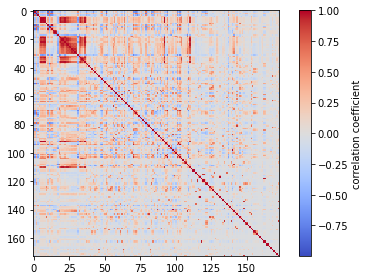

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

corrcoef = np.corrcoef(df_descriptors2.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
#plt.xticks(tick_marks, df.columns, rotation=90)
#plt.yticks(tick_marks, df.columns)
plt.tight_layout()

In [ ]:
threshold = 0.95
corrcoef = np.corrcoef(df_descriptors2.T.values.tolist())
selected_or_not = {}
for i, array in enumerate(corrcoef):
    if i not in selected_or_not.keys():
        selected_or_not[i] = True
    if selected_or_not[i]:
        for j, ary in enumerate(array): 
            if i < j:
                if abs(ary) >= threshold:
                    selected_or_not[j] = False

df_descriptors3 = df_descriptors2.iloc[:, [i for i, array in enumerate(corrcoef) if selected_or_not[i]]]
df_descriptors3

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...               0.0      0.0
1          8.990151        0.150741  ...               0.0      0.0
2          9.393241       -0.207824  ...               0.0      0.0
3          9.119284        0.353611  ...               0.0      0.0
4          2.401620        0.311389  ...               0.0      0.0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...               0.0      0.0
629       10.577593       -0.546019  ...               0.0      0.0
630        4.165093        1.049167  ...               0.0      0.0
631        9.567963        0.398056  ...               0.0      0.0
632       10.518632       -0.384815  ...               0.0      0.0

[633 rows x 151 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_descriptors3)
df_descriptors3 = pd.DataFrame(scaler.transform(df_descriptors3), columns=df_descriptors3.columns)
df_descriptors3

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane   fr_urea
0          1.275384       -0.158755  ...          -0.09218 -0.126694
1          0.280348        0.061810  ...          -0.09218 -0.126694
2          0.405152       -0.426983  ...          -0.09218 -0.126694
3          0.320330        0.338362  ...          -0.09218 -0.126694
4         -1.759587        0.280805  ...          -0.09218 -0.126694
..              ...             ...  ...               ...       ...
628        0.280444       -0.752320  ...          -0.09218 -0.126694
629        0.771850       -0.888008  ...          -0.09218 -0.126694
630       -1.213583        1.286539  ...          -0.09218 -0.126694
631        0.459249        0.398948  ...          -0.09218 -0.126694
632        0.753595       -0.668256  ...          -0.09218 -0.126694

[633 rows x 151 columns]

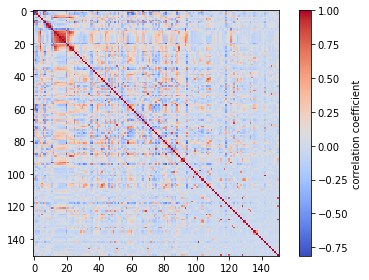

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

corrcoef = np.corrcoef(df_descriptors3.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
#plt.xticks(tick_marks, df.columns, rotation=90)
#plt.yticks(tick_marks, df.columns)
plt.tight_layout()

In [ ]:
df_descriptors = df_descriptors3

In [ ]:
!date

Mon Feb  8 08:20:19 UTC 2021


# トレーニングデータ、テストデータへの分割

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_descriptors, df, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((506, 151), (127, 151), (506, 20), (127, 20))

# Objective 1 : Molecular refractivity

## RandomForest を用いた特徴選択

In [ ]:
import optuna
from scikitallstars import all_sklearn

objective1_fs = all_sklearn.Objective(X_train, y_train['Molecular refractivity'])
objective1_fs.set_model_names(['RandomForest'])

optuna.logging.set_verbosity(optuna.logging.WARN)
study1_fs = optuna.create_study(direction='maximize')
study1_fs.optimize(objective1_fs, timeout=100, n_trials=100, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective1_fs.pkl', 'wb') as obj:
  pickle.dump(objective1_fs , obj)

In [ ]:
feature_importances_df = pd.DataFrame(
    objective1_fs.best_models["RandomForest"].model.feature_importances_, 
    columns=["RF feature importance"],
    index=X_train.columns
    ).dropna().sort_values("RF feature importance", ascending=False)

feature_importances_df.style.bar(subset=["RF feature importance"], align='mid')

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector1 = SelectFromModel(estimator=objective1_fs.best_model.model).fit(X_train, y_train['Molecular refractivity'])
X_train1 = X_train.iloc[:, selector1.get_support()]
X_test1 = X_test.iloc[:, selector1.get_support()]

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'selector1.pkl', 'wb') as obj:
  pickle.dump(selector1 , obj)

In [ ]:
X_train1

Chi0n     Chi1v
160 -1.602438 -1.418303
468  1.926565  1.707017
445 -0.553412 -0.056898
472 -0.486610 -0.330069
383  0.108130 -0.402989
..        ...       ...
61   0.121316  0.224418
355  0.530581  1.241321
0    2.107296  1.827507
631 -0.565201 -0.508331
438  0.786604  0.240449

[506 rows x 2 columns]

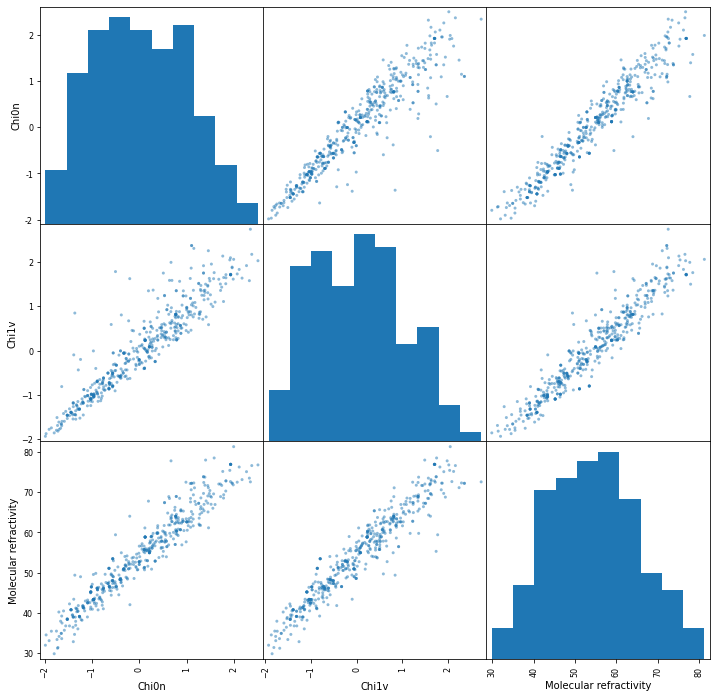

In [ ]:
import pandas as pd

df_concat = pd.concat([X_train1, y_train['Molecular refractivity']], axis=1)

pd.plotting.scatter_matrix(df_concat, figsize=(12, 12)) 
plt.show()

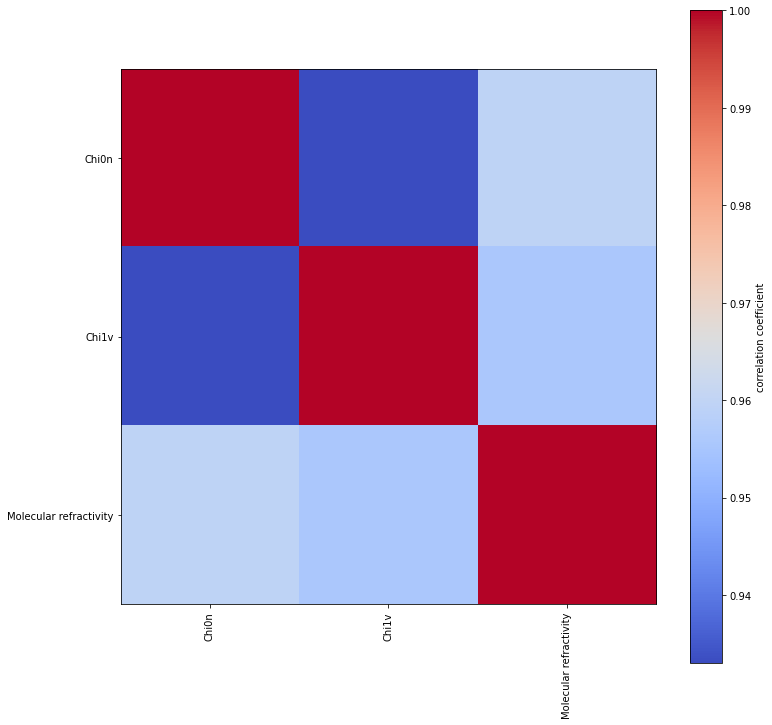

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
corrcoef = np.corrcoef(df_concat.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df_concat.columns, rotation=90)
plt.yticks(tick_marks, df_concat.columns)
#plt.tight_layout()
plt.show()

In [ ]:
pcaumap1 = all_sklearn.PCAUmap()
pcaumap1.fit(pd.concat([X_train1, X_test1]))

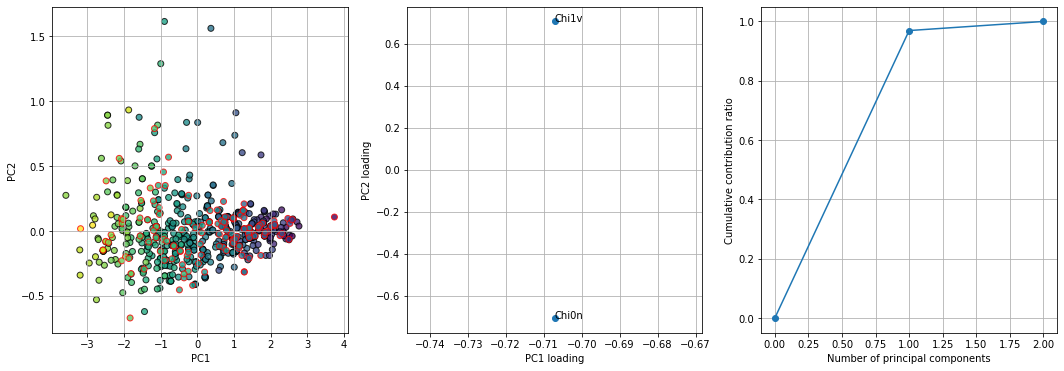

In [ ]:
all_sklearn.pca_summary(pcaumap1.pca, X_train1, y_train['Molecular refractivity'], X_test1, y_test=y_test['Molecular refractivity'])

inside function
   (0, 0)	1.0
  (0, 28)	0.3419828
  (0, 47)	0.19150124
  (0, 120)	0.3527897
  (0, 291)	0.44676816
  (0, 306)	0.3419828
  (0, 326)	0.3419828
  (0, 344)	0.14505556
  (0, 375)	0.19750066
  (0, 378)	0.14505556
  (0, 417)	0.14647268
  (0, 546)	0.4277234
  (0, 549)	0.14505556
  (0, 584)	0.33023307
  (0, 623)	0.3527897
  (1, 1)	1.0
  (1, 45)	6.435963e-07
  (1, 54)	2.3637668e-07
  (1, 90)	1.0
  (1, 116)	1.9167896e-08
  (1, 127)	3.4384948e-06
  (1, 168)	0.46829483
  (1, 374)	1.775484e-09
  (1, 389)	1.4076988e-09
  (1, 404)	1.0
  :	:
  (504, 322)	0.7907892
  (504, 381)	0.7907892
  (504, 467)	0.067535594
  (504, 474)	0.27762905
  (504, 504)	1.0
  (504, 506)	0.40235463
  (504, 517)	0.0665142
  (504, 544)	0.029488299
  (504, 578)	0.14775656
  (504, 607)	0.15724133
  (505, 53)	0.47892052
  (505, 111)	0.058175057
  (505, 124)	0.061088387
  (505, 148)	1.0
  (505, 232)	0.03777759
  (505, 262)	0.08199129
  (505, 271)	0.43775594
  (505, 293)	0.15120281
  (505, 296)	0.03777759
  (505, 316)

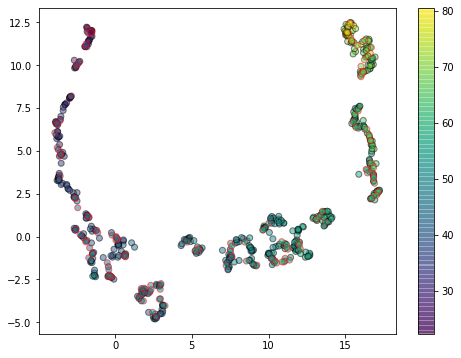

In [ ]:
all_sklearn.show_pcaumap(pcaumap1, X_train1, y_train['Molecular refractivity'], X_test1, y_test=y_test['Molecular refractivity'])

In [ ]:
!date

Mon Feb  8 08:22:40 UTC 2021


## 選択された特徴を用いた予測

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1 = all_sklearn.Objective(X_train1, y_train['Molecular refractivity'])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective1.get_model_names()
for model_name in model_names:
    objective1.set_model_names([model_name])
    study1 = optuna.create_study(direction='maximize')
    study1.optimize(objective1, timeout=100, n_trials=100, show_progress_bar=True)

objective1.set_model_names(model_names)
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective1, timeout=100, n_trials=100, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMa

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective1.pkl', 'wb') as obj:
  pickle.dump(objective1 , obj)

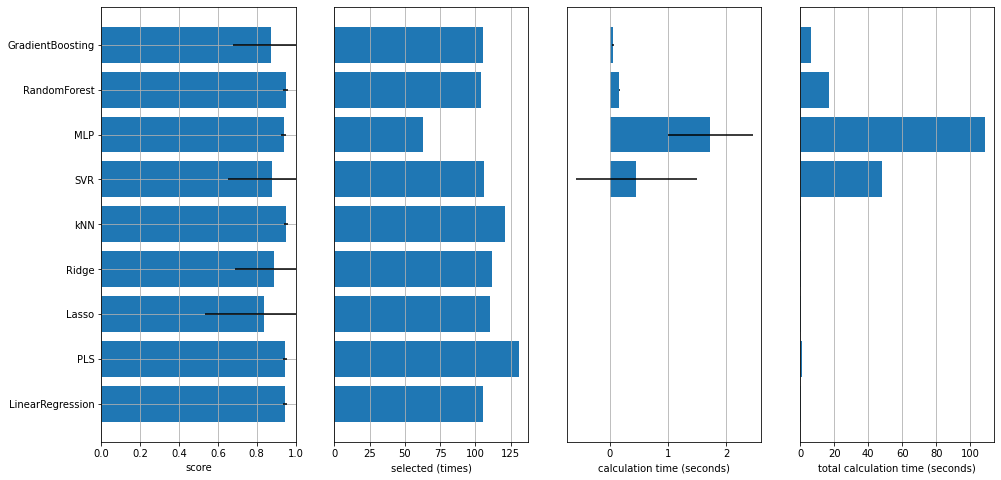

In [ ]:
all_sklearn.objective_summary(objective1)

In [ ]:
objective1.best_scores

{'GradientBoosting': 0.9709591983137837,
 'Lasso': 0.9695149461090279,
 'LinearRegression': 0.9633413641659536,
 'MLP': 0.9609673901335722,
 'PLS': 0.9711890329860439,
 'RandomForest': 0.9706852407033747,
 'Ridge': 0.9679251079217157,
 'SVR': 0.9702634849322098,
 'kNN': 0.9763803676685345}

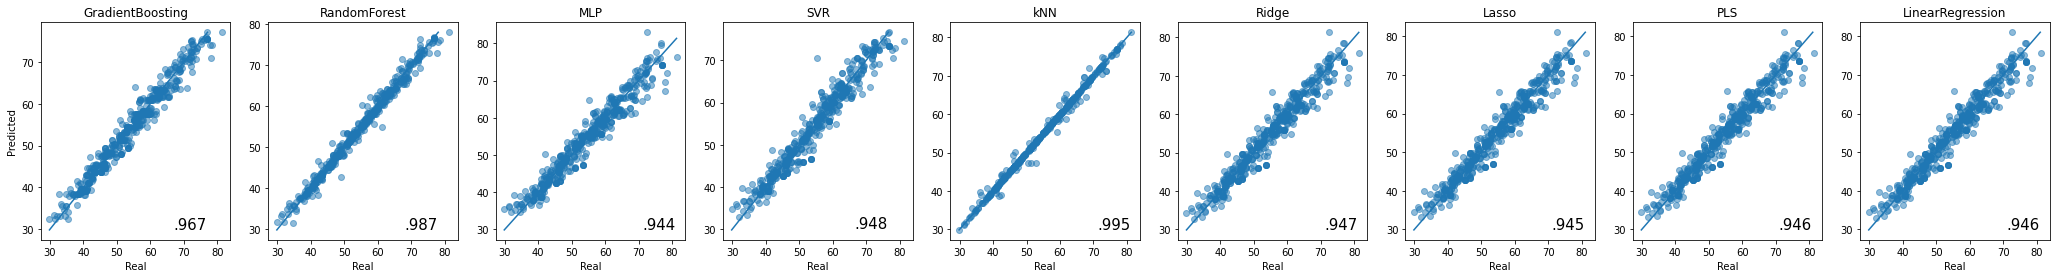

In [ ]:
all_sklearn.show_allsklearn_metrics(objective1, X_train1, y_train['Molecular refractivity'])

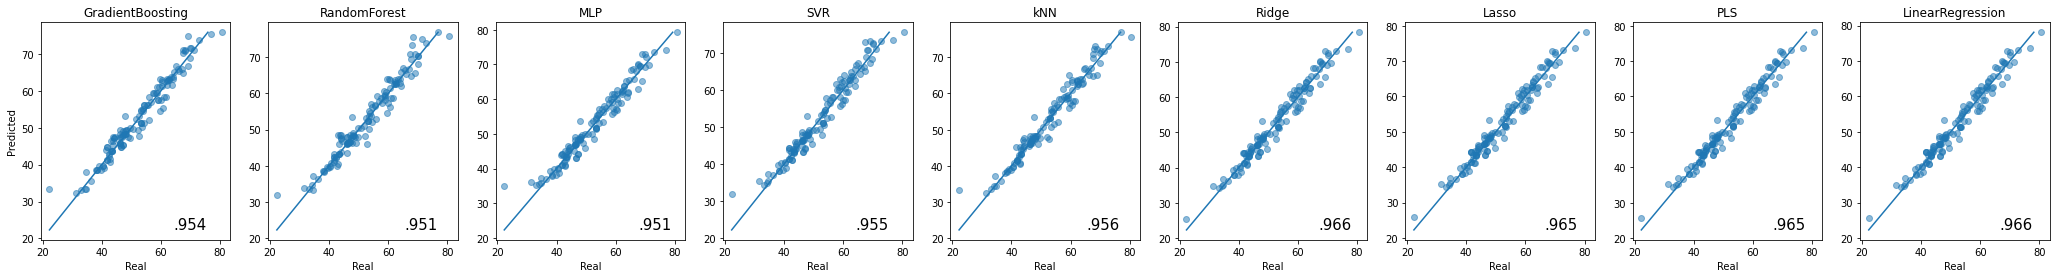

In [ ]:
all_sklearn.show_allsklearn_metrics(objective1, X_test1, y_test['Molecular refractivity'])

inside function
   (0, 0)	1.0
  (0, 28)	0.3419828
  (0, 47)	0.19150124
  (0, 120)	0.3527897
  (0, 291)	0.44676816
  (0, 306)	0.3419828
  (0, 326)	0.3419828
  (0, 344)	0.14505556
  (0, 375)	0.19750066
  (0, 378)	0.14505556
  (0, 417)	0.14647268
  (0, 546)	0.4277234
  (0, 549)	0.14505556
  (0, 584)	0.33023307
  (0, 623)	0.3527897
  (1, 1)	1.0
  (1, 45)	6.435963e-07
  (1, 54)	2.3637668e-07
  (1, 90)	1.0
  (1, 116)	1.9167896e-08
  (1, 127)	3.4384948e-06
  (1, 168)	0.46829483
  (1, 374)	1.775484e-09
  (1, 389)	1.4076988e-09
  (1, 404)	1.0
  :	:
  (504, 322)	0.7907892
  (504, 381)	0.7907892
  (504, 467)	0.067535594
  (504, 474)	0.27762905
  (504, 504)	1.0
  (504, 506)	0.40235463
  (504, 517)	0.0665142
  (504, 544)	0.029488299
  (504, 578)	0.14775656
  (504, 607)	0.15724133
  (505, 53)	0.47892052
  (505, 111)	0.058175057
  (505, 124)	0.061088387
  (505, 148)	1.0
  (505, 232)	0.03777759
  (505, 262)	0.08199129
  (505, 271)	0.43775594
  (505, 293)	0.15120281
  (505, 296)	0.03777759
  (505, 316)

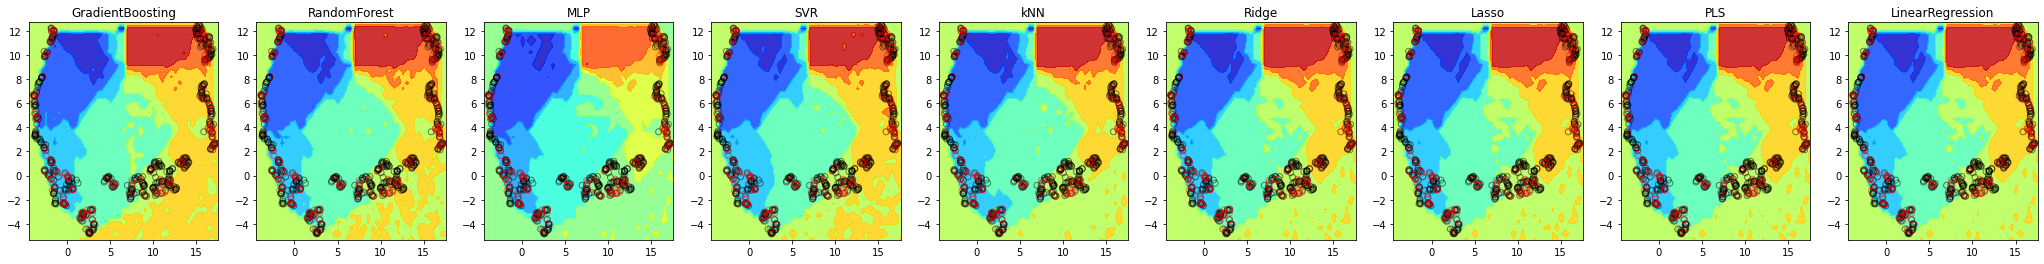

In [ ]:
all_sklearn.show_allsklearn_pcaumap(objective1, pcaumap1, X_train1, X_test=X_test1)

In [ ]:
!date

Mon Feb  8 08:26:18 UTC 2021


In [ ]:
stacking_model1 = all_sklearn.stacking(objective1)
stacking_model1.fit(X_train1, y_train['Molecular refractivity'])
stacking_model1.score(X_test1, y_test['Molecular refractivity'])

0.9671279401250282

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'stacking_model1.pkl', 'wb') as obj:
  pickle.dump(stacking_model1 , obj)

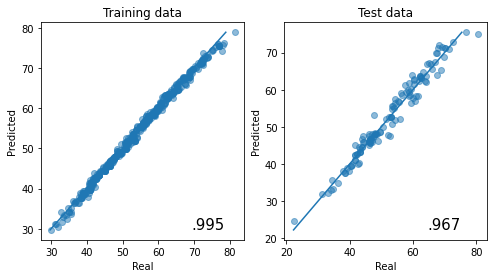

In [ ]:
all_sklearn.show_metrics(stacking_model1, X_train1, X_test1, y_train['Molecular refractivity'], y_test['Molecular refractivity'])

inside function
   (0, 0)	1.0
  (0, 28)	0.3419828
  (0, 47)	0.19150124
  (0, 120)	0.3527897
  (0, 291)	0.44676816
  (0, 306)	0.3419828
  (0, 326)	0.3419828
  (0, 344)	0.14505556
  (0, 375)	0.19750066
  (0, 378)	0.14505556
  (0, 417)	0.14647268
  (0, 546)	0.4277234
  (0, 549)	0.14505556
  (0, 584)	0.33023307
  (0, 623)	0.3527897
  (1, 1)	1.0
  (1, 45)	6.435963e-07
  (1, 54)	2.3637668e-07
  (1, 90)	1.0
  (1, 116)	1.9167896e-08
  (1, 127)	3.4384948e-06
  (1, 168)	0.46829483
  (1, 374)	1.775484e-09
  (1, 389)	1.4076988e-09
  (1, 404)	1.0
  :	:
  (504, 322)	0.7907892
  (504, 381)	0.7907892
  (504, 467)	0.067535594
  (504, 474)	0.27762905
  (504, 504)	1.0
  (504, 506)	0.40235463
  (504, 517)	0.0665142
  (504, 544)	0.029488299
  (504, 578)	0.14775656
  (504, 607)	0.15724133
  (505, 53)	0.47892052
  (505, 111)	0.058175057
  (505, 124)	0.061088387
  (505, 148)	1.0
  (505, 232)	0.03777759
  (505, 262)	0.08199129
  (505, 271)	0.43775594
  (505, 293)	0.15120281
  (505, 296)	0.03777759
  (505, 316)

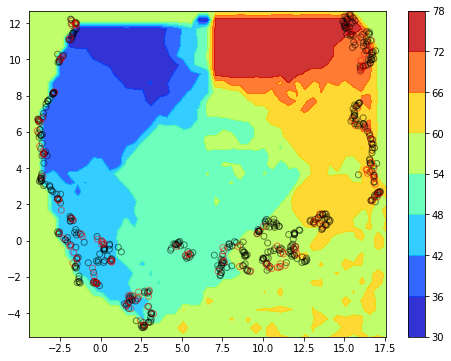

In [ ]:
all_sklearn.show_pcaumap(pcaumap1, X_train1, X_test=X_test1, model=stacking_model1)

In [ ]:
!date

Mon Feb  8 08:26:35 UTC 2021


In [ ]:
import shap 

sample_size = 100
pred_func = lambda X: stacking_model1.predict(X).ravel()
explainer1 = shap.KernelExplainer(pred_func, shap.kmeans(X_test1, sample_size))
shap_values1 = explainer1.shap_values(X_test1)

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'shap_values1.pkl', 'wb') as obj:
  pickle.dump(shap_values1 , obj)

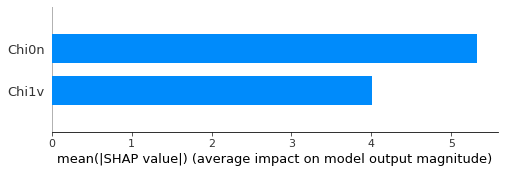

In [ ]:
shap.summary_plot(shap_values1, features=X_test1, plot_type="bar")

In [ ]:
global_shap_values = np.abs(shap_values1).mean(0)
shap_corr = [np.corrcoef(shap_values1[:, i], X_test1.iloc[:, i])[0, 1] for i in range(len(shap_values1.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)

global_shap_coefs_df = pd.DataFrame(
    global_shap_coefs, 
    columns=["Global SHAP coef"],
    index=X_test1.columns
    ).dropna().sort_values("Global SHAP coef", ascending=False)

global_shap_coefs_df.style.bar(subset=["Global SHAP coef"], align='mid')

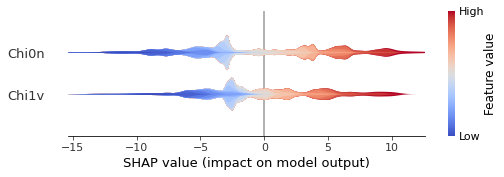

In [ ]:
shap.summary_plot(shap_values1, features=X_test1, plot_type="layered_violin")

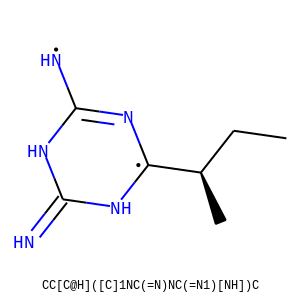

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

index = 0

smile = df['Open Babel SMILES'][X_test1.index[index]]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [ ]:
shap.initjs()
shap.force_plot(explainer1.expected_value, shap_values1[index,:], X_test1.iloc[index, :], link="logit")

In [ ]:
shap.initjs()
shap.force_plot(explainer1.expected_value, shap_values1, X_test1)

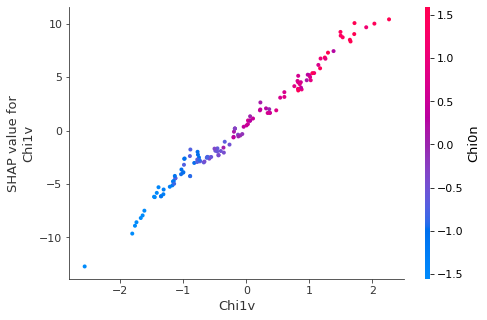

In [ ]:
shap.dependence_plot("Chi1v", shap_values1, X_test1)

In [ ]:
!date

Mon Feb  8 08:26:47 UTC 2021


# Objective 2: HOMO-LUMO gap

## RandomForest を用いた特徴選択

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective2_fs = all_sklearn.Objective(X_train, y_train["HOMO-LUMO gap"])
objective2_fs.set_model_names(['RandomForest'])

optuna.logging.set_verbosity(optuna.logging.WARN)
study2_fs = optuna.create_study(direction='maximize')
study2_fs.optimize(objective2_fs, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective2_fs.pkl', 'wb') as obj:
  pickle.dump(objective2_fs , obj)

In [ ]:
feature_importances_df = pd.DataFrame(
    objective2_fs.best_models["RandomForest"].model.feature_importances_, 
    columns=["RF feature importance"],
    index=X_train.columns
    ).dropna().sort_values("RF feature importance", ascending=False)

feature_importances_df.style.bar(subset=["RF feature importance"], align='mid')

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector2 = SelectFromModel(estimator=objective2_fs.best_models["RandomForest"].model).fit(X_train, y_train["HOMO-LUMO gap"])
X_train2 = X_train.iloc[:, selector2.get_support()]
X_test2 = X_test.iloc[:, selector2.get_support()]

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'selector2.pkl', 'wb') as obj:
  pickle.dump(selector2 , obj)

In [ ]:
X_train2

MaxEStateIndex  MinAbsEStateIndex  ...   MolLogP  fr_ketone
160       -0.274605          -0.807687  ... -1.984905  -0.332936
468       -1.179799           1.165793  ...  1.639602  -0.332936
445       -1.777863           2.189987  ...  0.704115  -0.332936
472       -1.140865           1.376728  ...  0.024852  -0.332936
383        0.802818          -0.010506  ... -0.271482  -0.332936
..              ...                ...  ...       ...        ...
61        -1.802948           2.255829  ...  1.453127  -0.332936
355       -1.393405           1.664452  ...  0.220936  -0.332936
0          1.275384          -1.085947  ...  0.299446  -0.332936
631        0.459249          -0.104976  ...  0.728658  -0.332936
438        0.338964          -0.290173  ...  0.081668  -0.332936

[506 rows x 21 columns]

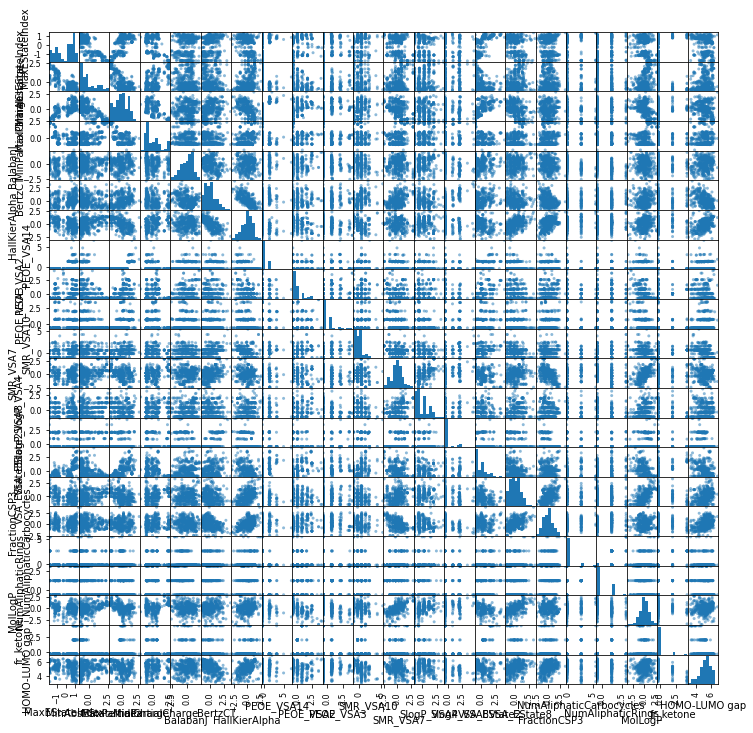

In [ ]:
import pandas as pd

df_concat = pd.concat([X_train2, y_train["HOMO-LUMO gap"]], axis=1)

pd.plotting.scatter_matrix(df_concat, figsize=(12, 12)) 
plt.show()

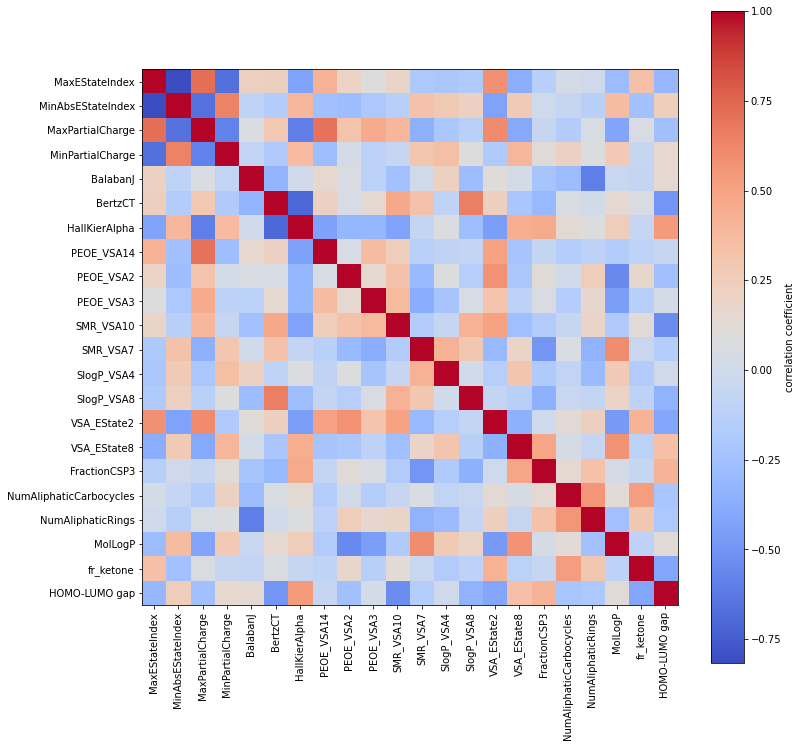

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
corrcoef = np.corrcoef(df_concat.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df_concat.columns, rotation=90)
plt.yticks(tick_marks, df_concat.columns)
#plt.tight_layout()
plt.show()

In [ ]:
pcaumap2 = all_sklearn.PCAUmap()
pcaumap2.fit(pd.concat([X_train2, X_test2], axis=0))

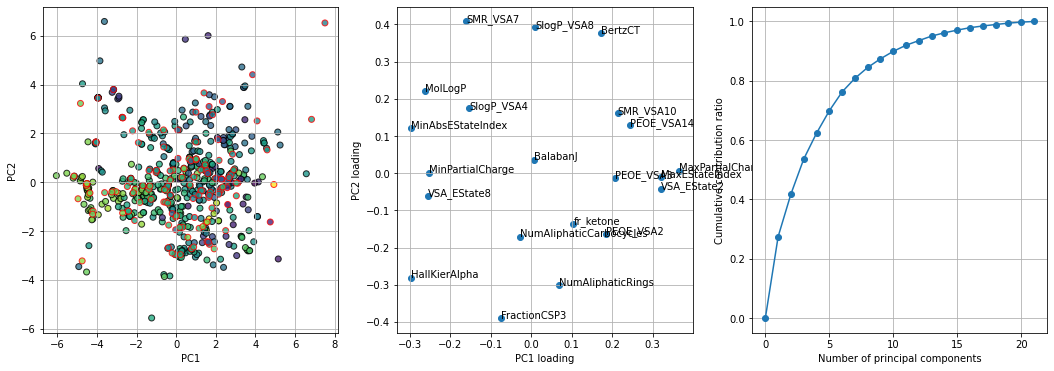

In [ ]:
all_sklearn.pca_summary(pcaumap2.pca, X_train2, y_train['HOMO-LUMO gap'], X_test2, y_test['HOMO-LUMO gap'])

inside function
   (0, 0)	1.0
  (0, 125)	0.23176824
  (0, 183)	0.51970077
  (0, 200)	0.22977617
  (0, 202)	0.23523511
  (0, 337)	0.2340429
  (0, 342)	0.2771091
  (0, 343)	0.518481
  (0, 403)	0.23175016
  (0, 431)	0.244567
  (0, 466)	0.232973
  (0, 544)	0.2250122
  (0, 558)	0.2660099
  (0, 569)	0.22505355
  (0, 596)	0.23540585
  (1, 1)	1.0
  (1, 43)	0.057906173
  (1, 90)	0.86964643
  (1, 168)	0.7567086
  (1, 194)	0.059517972
  (1, 240)	0.06079412
  (1, 281)	0.05732669
  (1, 404)	0.441794
  (1, 414)	0.4185191
  (1, 478)	0.081942275
  :	:
  (504, 263)	0.20663412
  (504, 268)	0.13663293
  (504, 275)	0.16111118
  (504, 306)	0.10533632
  (504, 322)	0.75866604
  (504, 381)	0.64693195
  (504, 504)	1.0
  (504, 578)	0.13293716
  (504, 592)	0.13472135
  (504, 595)	0.19940269
  (505, 23)	0.18018523
  (505, 65)	0.123427615
  (505, 148)	0.76408494
  (505, 189)	0.1917077
  (505, 207)	0.4755831
  (505, 271)	0.27837172
  (505, 308)	0.105574675
  (505, 351)	0.9044272
  (505, 362)	0.13547315
  (505, 383)

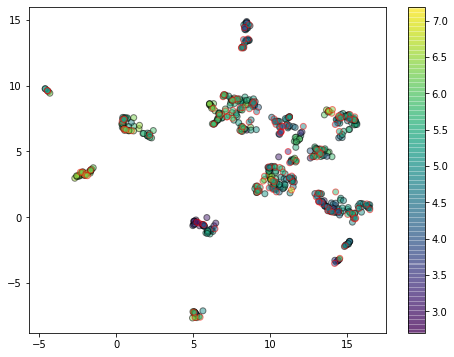

In [ ]:
all_sklearn.show_pcaumap(pcaumap2, X_train2, y_train['HOMO-LUMO gap'], X_test2, y_test['HOMO-LUMO gap'])

In [ ]:
!date

Mon Feb  8 08:29:02 UTC 2021


## 選択された特徴を用いた予測

In [ ]:
import optuna
from scikitallstars import all_sklearn

objective2 = all_sklearn.Objective(X_train2, y_train["HOMO-LUMO gap"])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective2.get_model_names()
for model_name in model_names:
    objective2.set_model_names([model_name])
    study2 = optuna.create_study(direction='maximize')
    study2.optimize(objective2, timeout=100, n_trials=100, show_progress_bar=True)

objective2.set_model_names(model_names)
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective2.pkl', 'wb') as obj:
  pickle.dump(objective2 , obj)

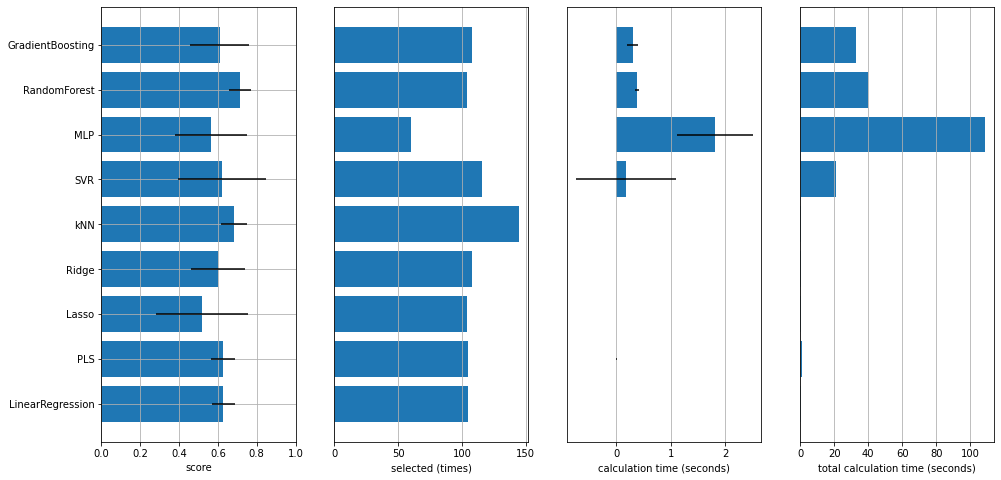

In [ ]:
all_sklearn.objective_summary(objective2)

In [ ]:
objective2.best_scores

{'GradientBoosting': 0.8100122126562663,
 'Lasso': 0.7478388622284644,
 'LinearRegression': 0.7465059508134035,
 'MLP': 0.7817114378816887,
 'PLS': 0.7800408338237517,
 'RandomForest': 0.8307526901820792,
 'Ridge': 0.7539682096595257,
 'SVR': 0.8222410799754095,
 'kNN': 0.8240530248520368}

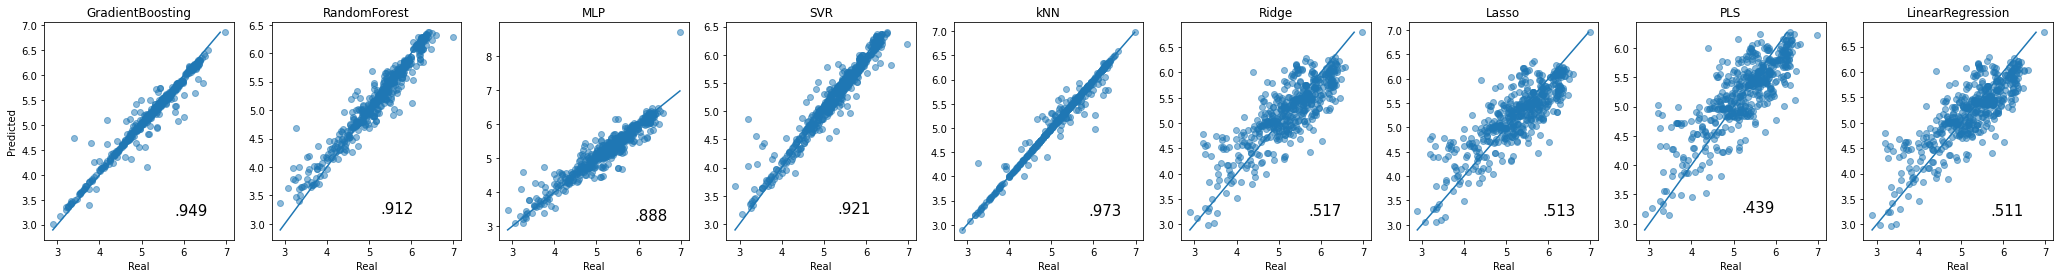

In [ ]:
all_sklearn.show_allsklearn_metrics(objective2, X_train2, y_train["HOMO-LUMO gap"])

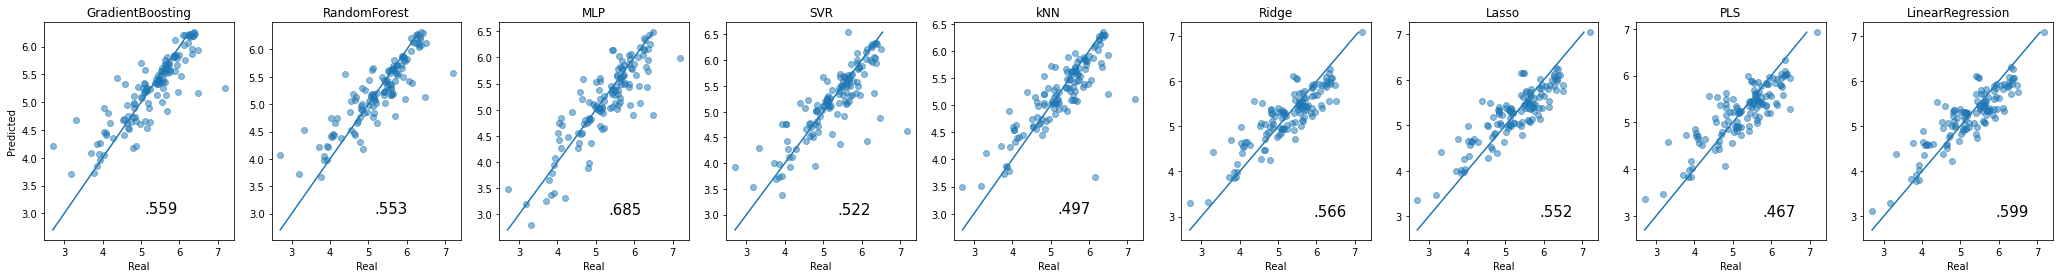

In [ ]:
all_sklearn.show_allsklearn_metrics(objective2, X_test2, y_test["HOMO-LUMO gap"])

inside function
   (0, 0)	1.0
  (0, 125)	0.23176824
  (0, 183)	0.51970077
  (0, 200)	0.22977617
  (0, 202)	0.23523511
  (0, 337)	0.2340429
  (0, 342)	0.2771091
  (0, 343)	0.518481
  (0, 403)	0.23175016
  (0, 431)	0.244567
  (0, 466)	0.232973
  (0, 544)	0.2250122
  (0, 558)	0.2660099
  (0, 569)	0.22505355
  (0, 596)	0.23540585
  (1, 1)	1.0
  (1, 43)	0.057906173
  (1, 90)	0.86964643
  (1, 168)	0.7567086
  (1, 194)	0.059517972
  (1, 240)	0.06079412
  (1, 281)	0.05732669
  (1, 404)	0.441794
  (1, 414)	0.4185191
  (1, 478)	0.081942275
  :	:
  (504, 263)	0.20663412
  (504, 268)	0.13663293
  (504, 275)	0.16111118
  (504, 306)	0.10533632
  (504, 322)	0.75866604
  (504, 381)	0.64693195
  (504, 504)	1.0
  (504, 578)	0.13293716
  (504, 592)	0.13472135
  (504, 595)	0.19940269
  (505, 23)	0.18018523
  (505, 65)	0.123427615
  (505, 148)	0.76408494
  (505, 189)	0.1917077
  (505, 207)	0.4755831
  (505, 271)	0.27837172
  (505, 308)	0.105574675
  (505, 351)	0.9044272
  (505, 362)	0.13547315
  (505, 383)

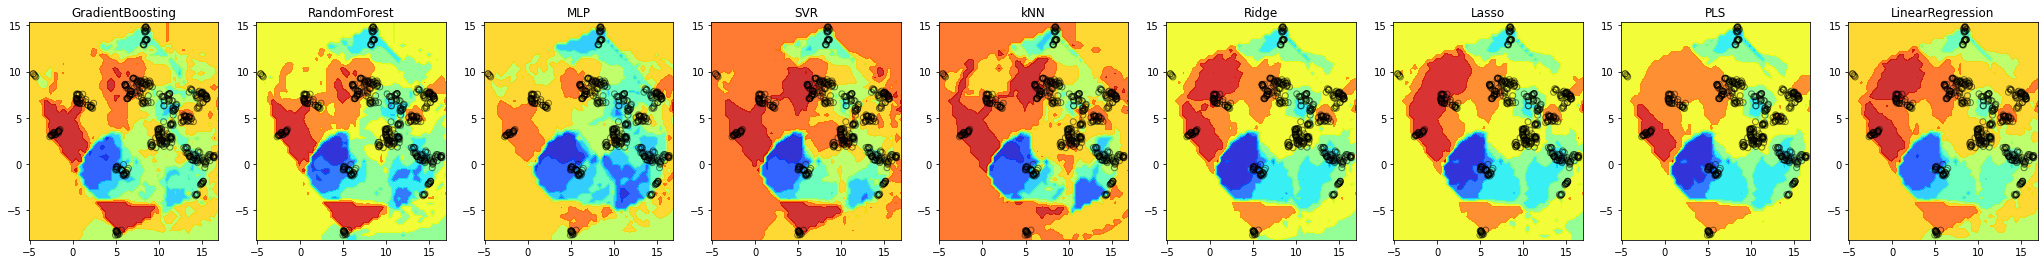

In [ ]:
all_sklearn.show_allsklearn_pcaumap(objective2, pcaumap2, X_train2, X_test2)

In [ ]:
!date

Mon Feb  8 08:33:44 UTC 2021


In [ ]:
stacking_model2 = all_sklearn.stacking(objective2)
stacking_model2.fit(X_train2, y_train["HOMO-LUMO gap"])
stacking_model2.score(X_test2, y_test["HOMO-LUMO gap"])

0.7875359758052685

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'stacking_model2.pkl', 'wb') as obj:
  pickle.dump(stacking_model2 , obj)

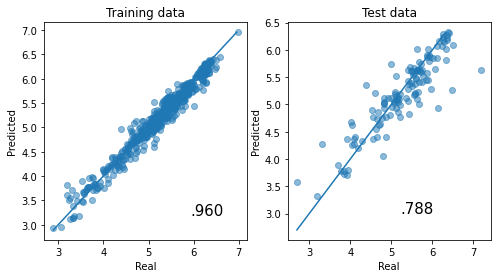

In [ ]:
all_sklearn.show_metrics(stacking_model2, X_train2, X_test2, y_train['HOMO-LUMO gap'], y_test['HOMO-LUMO gap'])

inside function
   (0, 0)	1.0
  (0, 125)	0.23176824
  (0, 183)	0.51970077
  (0, 200)	0.22977617
  (0, 202)	0.23523511
  (0, 337)	0.2340429
  (0, 342)	0.2771091
  (0, 343)	0.518481
  (0, 403)	0.23175016
  (0, 431)	0.244567
  (0, 466)	0.232973
  (0, 544)	0.2250122
  (0, 558)	0.2660099
  (0, 569)	0.22505355
  (0, 596)	0.23540585
  (1, 1)	1.0
  (1, 43)	0.057906173
  (1, 90)	0.86964643
  (1, 168)	0.7567086
  (1, 194)	0.059517972
  (1, 240)	0.06079412
  (1, 281)	0.05732669
  (1, 404)	0.441794
  (1, 414)	0.4185191
  (1, 478)	0.081942275
  :	:
  (504, 263)	0.20663412
  (504, 268)	0.13663293
  (504, 275)	0.16111118
  (504, 306)	0.10533632
  (504, 322)	0.75866604
  (504, 381)	0.64693195
  (504, 504)	1.0
  (504, 578)	0.13293716
  (504, 592)	0.13472135
  (504, 595)	0.19940269
  (505, 23)	0.18018523
  (505, 65)	0.123427615
  (505, 148)	0.76408494
  (505, 189)	0.1917077
  (505, 207)	0.4755831
  (505, 271)	0.27837172
  (505, 308)	0.105574675
  (505, 351)	0.9044272
  (505, 362)	0.13547315
  (505, 383)

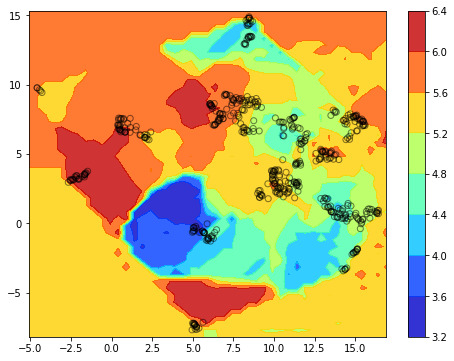

In [ ]:
all_sklearn.show_pcaumap(pcaumap2, X_train2, X_test2, model=stacking_model2)

In [ ]:
!date

Mon Feb  8 08:34:18 UTC 2021


In [ ]:
import shap 

sample_size = 100
pred_func = lambda X: stacking_model2.predict(X).ravel()
explainer2 = shap.KernelExplainer(pred_func, shap.kmeans(X_test2, sample_size))
shap_values2 = explainer2.shap_values(X_test2)

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'shap_values2.pkl', 'wb') as obj:
  pickle.dump(shap_values2 , obj)

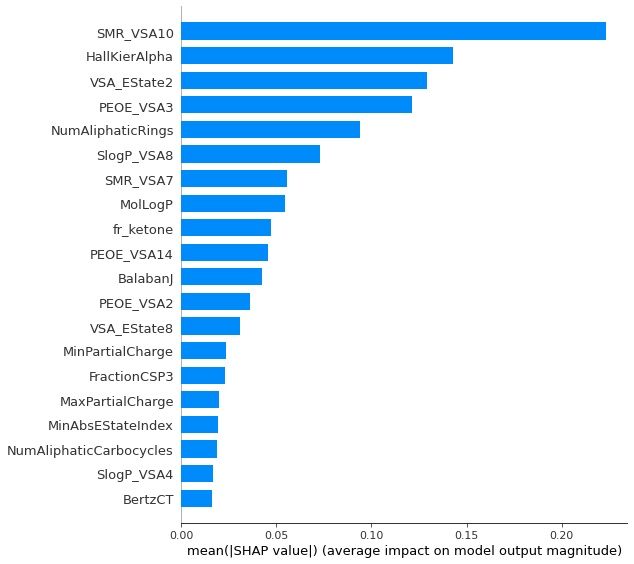

In [ ]:
shap.summary_plot(shap_values2, features=X_test2, plot_type="bar")

In [ ]:
global_shap_values = np.abs(shap_values2).mean(0)
shap_corr = [np.corrcoef(shap_values2[:, i], X_test2.iloc[:, i])[0, 1] for i in range(len(shap_values2.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)

global_shap_coefs_df = pd.DataFrame(
    global_shap_coefs, 
    columns=["Global SHAP coef"],
    index=X_test2.columns
    ).dropna().sort_values("Global SHAP coef", ascending=False)

global_shap_coefs_df.style.bar(subset=["Global SHAP coef"], align='mid')

not enough data in bin #2 for feature NumAliphaticCarbocycles, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #2 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #4 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #6 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #9 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #10 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #11 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #12 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #13 for feature PEOE_VSA1

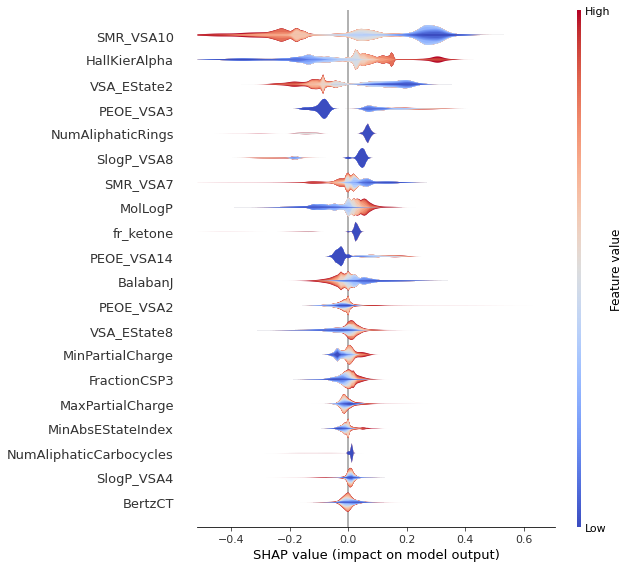

In [ ]:
shap.summary_plot(shap_values2, features=X_test2, plot_type="layered_violin")

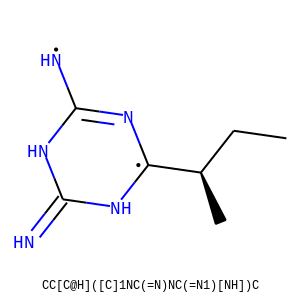

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

index = 0

smile = df['Open Babel SMILES'][X_test.index[index]]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [ ]:
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2[index,:], X_test2.iloc[index, :], link="logit")

In [ ]:
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2, X_test2)

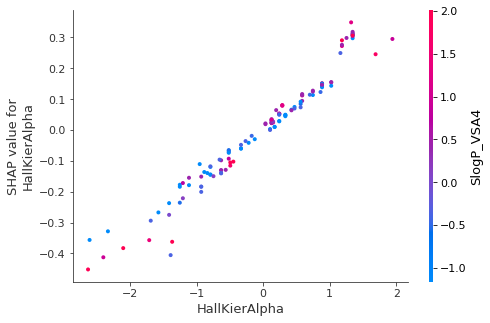

In [ ]:
shap.dependence_plot("HallKierAlpha", shap_values2, X_test2)

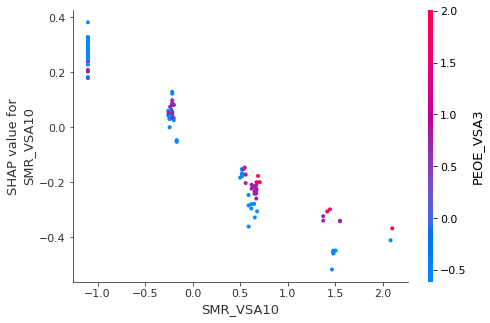

In [ ]:
shap.dependence_plot("SMR_VSA10", shap_values2, X_test2)

In [ ]:
!date

Mon Feb  8 08:57:55 UTC 2021


# Objective 3: Dipole moment

## RandomForest を用いた特徴選択

In [ ]:
import optuna
from scikitallstars import all_sklearn

objective3_fs = all_sklearn.Objective(X_train, y_train["Dipole moment"])
objective3_fs.set_model_names(['RandomForest'])

optuna.logging.set_verbosity(optuna.logging.WARN)
study3_fs = optuna.create_study(direction='maximize')
study3_fs.optimize(objective3_fs, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective3_fs.pkl', 'wb') as obj:
  pickle.dump(objective3_fs , obj)

In [ ]:
feature_importances_df = pd.DataFrame(
    objective3_fs.best_models["RandomForest"].model.feature_importances_, 
    columns=["RF feature importance"],
    index=X_train.columns
    ).dropna().sort_values("RF feature importance", ascending=False)

feature_importances_df.style.bar(subset=["RF feature importance"], align='mid')

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector3 = SelectFromModel(estimator=objective3_fs.best_models["RandomForest"].model).fit(X_train, y_train["Dipole moment"])
X_train3 = X_train.iloc[:, selector3.get_support()]
X_test3 = X_test.iloc[:, selector3.get_support()]

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'selector3.pkl', 'wb') as obj:
  pickle.dump(selector3 , obj)

In [ ]:
X_train3

MaxEStateIndex  MinEStateIndex  ...  fr_allylic_oxid  fr_nitro
160       -0.274605        0.021040  ...        -0.263326 -0.247387
468       -1.179799        1.082348  ...        -0.263326 -0.247387
445       -1.777863        1.633144  ...        -0.263326 -0.247387
472       -1.140865        1.195786  ...        -0.263326 -0.247387
383        0.802818        0.449753  ...        -0.263326 -0.247387
..              ...             ...  ...              ...       ...
61        -1.802948        1.668553  ...        -0.263326 -0.247387
355       -1.393405        1.350520  ...        -0.263326 -0.247387
0          1.275384       -0.158755  ...         3.938824 -0.247387
631        0.459249        0.398948  ...        -0.263326 -0.247387
438        0.338964       -0.586709  ...        -0.263326 -0.247387

[506 rows x 29 columns]

In [ ]:
import pandas as pd

df_concat = pd.concat([X_train3, y_train["Dipole moment"]], axis=1)

#pd.plotting.scatter_matrix(df_concat, figsize=(12, 12)) 
#plt.show()

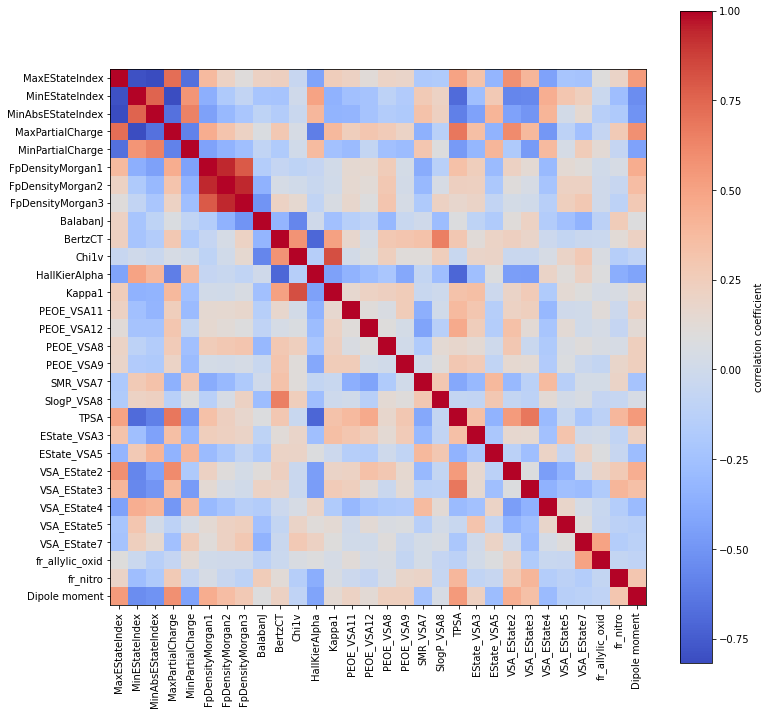

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
corrcoef = np.corrcoef(df_concat.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df_concat.columns, rotation=90)
plt.yticks(tick_marks, df_concat.columns)
#plt.tight_layout()
plt.show()

In [ ]:
pcaumap3 = all_sklearn.PCAUmap()
pcaumap3.fit(pd.concat([X_train3, X_test3]))

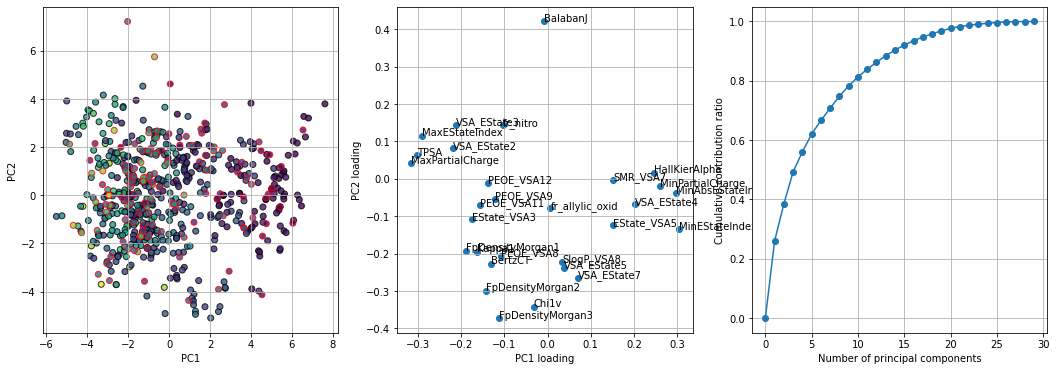

In [ ]:
all_sklearn.pca_summary(pcaumap3.pca, X_train3, y_train['Dipole moment'], X_test3, y_test['Dipole moment'])

inside function
   (0, 0)	1.0
  (0, 30)	0.23143145
  (0, 60)	0.2785765
  (0, 70)	0.26328284
  (0, 100)	0.2319978
  (0, 183)	0.44524938
  (0, 253)	0.2463843
  (0, 337)	0.2432278
  (0, 342)	0.23716782
  (0, 343)	0.55147177
  (0, 431)	0.2410368
  (0, 441)	0.23406525
  (0, 506)	0.23299545
  (0, 514)	0.23466414
  (0, 527)	0.23534209
  (1, 1)	1.0
  (1, 17)	0.16990797
  (1, 43)	0.12923414
  (1, 90)	0.649298
  (1, 145)	0.12632896
  (1, 168)	0.5355975
  (1, 281)	0.1284786
  (1, 309)	0.17931938
  (1, 404)	0.3428641
  (1, 414)	0.33650342
  :	:
  (504, 234)	0.31404752
  (504, 242)	0.2511034
  (504, 263)	0.22264726
  (504, 275)	0.18731484
  (504, 306)	0.16644853
  (504, 322)	0.825982
  (504, 326)	0.20016116
  (504, 381)	0.53169745
  (504, 504)	1.0
  (504, 615)	0.12314667
  (505, 23)	0.18282264
  (505, 32)	0.223136
  (505, 65)	0.16166244
  (505, 99)	0.1446564
  (505, 109)	0.17357364
  (505, 134)	0.13995476
  (505, 148)	0.633253
  (505, 207)	0.32398906
  (505, 245)	0.18326531
  (505, 246)	0.16261388


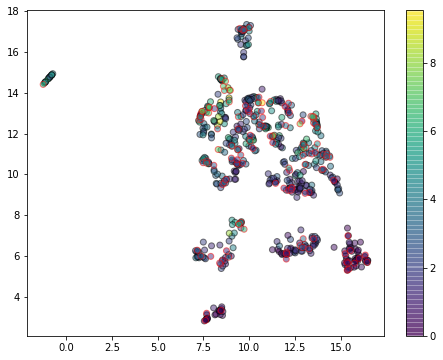

In [ ]:
all_sklearn.show_pcaumap(pcaumap3, X_train3, y_train['Dipole moment'], X_test3, y_test['Dipole moment'])

In [ ]:
!date

Mon Feb  8 08:59:47 UTC 2021


## 選択された特徴を用いた予測

In [ ]:
import optuna
from scikitallstars import all_sklearn

objective3 = all_sklearn.Objective(X_train3, y_train["Dipole moment"])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective3.get_model_names()
for model_name in model_names:
    objective3.set_model_names([model_name])
    study3 = optuna.create_study(direction='maximize')
    study3.optimize(objective3, timeout=100, n_trials=100, show_progress_bar=True)

objective3.set_model_names(model_names)
study3 = optuna.create_study(direction='maximize')
study3.optimize(objective3, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective3.pkl', 'wb') as obj:
  pickle.dump(objective3 , obj)

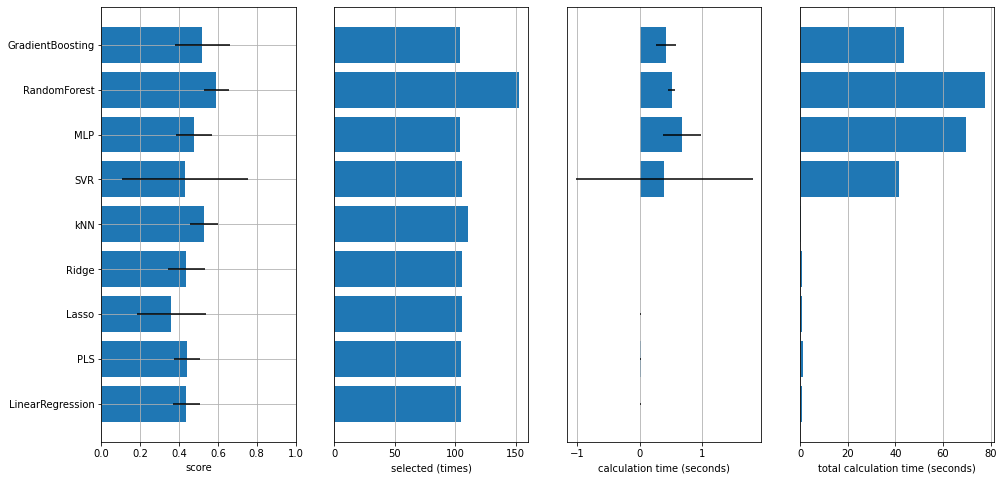

In [ ]:
all_sklearn.objective_summary(objective3)

In [ ]:
objective3.best_scores

{'GradientBoosting': 0.7110762656617776,
 'Lasso': 0.5654519288795128,
 'LinearRegression': 0.5832423184101259,
 'MLP': 0.695111765585084,
 'PLS': 0.6232176710196932,
 'RandomForest': 0.7719400954297783,
 'Ridge': 0.6032145023171998,
 'SVR': 0.7039402950051024,
 'kNN': 0.6959689332550264}

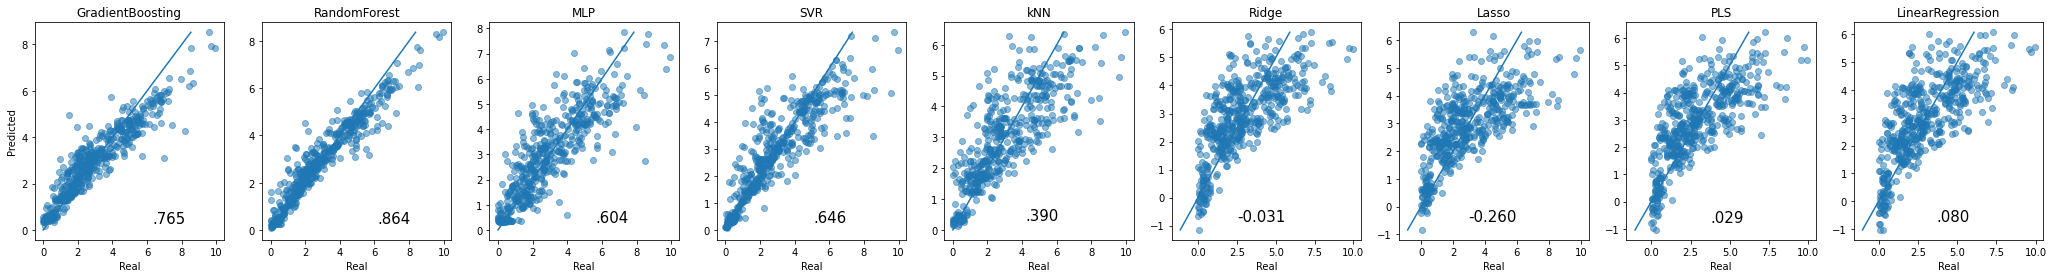

In [ ]:
all_sklearn.show_allsklearn_metrics(objective3, X_train3, y_train["Dipole moment"])

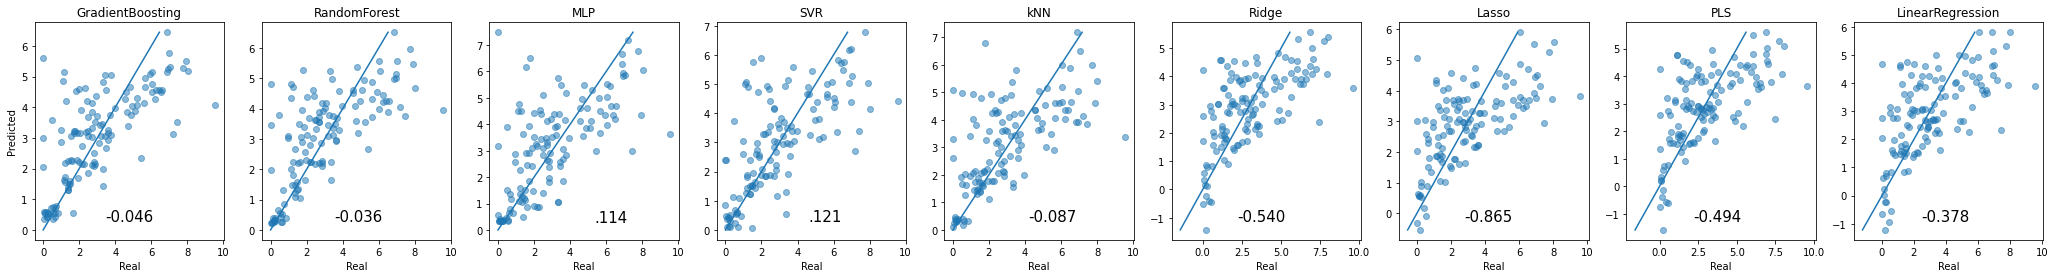

In [ ]:
all_sklearn.show_allsklearn_metrics(objective3, X_test3, y_test["Dipole moment"])

inside function
   (0, 0)	1.0
  (0, 30)	0.23143145
  (0, 60)	0.2785765
  (0, 70)	0.26328284
  (0, 100)	0.2319978
  (0, 183)	0.44524938
  (0, 253)	0.2463843
  (0, 337)	0.2432278
  (0, 342)	0.23716782
  (0, 343)	0.55147177
  (0, 431)	0.2410368
  (0, 441)	0.23406525
  (0, 506)	0.23299545
  (0, 514)	0.23466414
  (0, 527)	0.23534209
  (1, 1)	1.0
  (1, 17)	0.16990797
  (1, 43)	0.12923414
  (1, 90)	0.649298
  (1, 145)	0.12632896
  (1, 168)	0.5355975
  (1, 281)	0.1284786
  (1, 309)	0.17931938
  (1, 404)	0.3428641
  (1, 414)	0.33650342
  :	:
  (504, 234)	0.31404752
  (504, 242)	0.2511034
  (504, 263)	0.22264726
  (504, 275)	0.18731484
  (504, 306)	0.16644853
  (504, 322)	0.825982
  (504, 326)	0.20016116
  (504, 381)	0.53169745
  (504, 504)	1.0
  (504, 615)	0.12314667
  (505, 23)	0.18282264
  (505, 32)	0.223136
  (505, 65)	0.16166244
  (505, 99)	0.1446564
  (505, 109)	0.17357364
  (505, 134)	0.13995476
  (505, 148)	0.633253
  (505, 207)	0.32398906
  (505, 245)	0.18326531
  (505, 246)	0.16261388


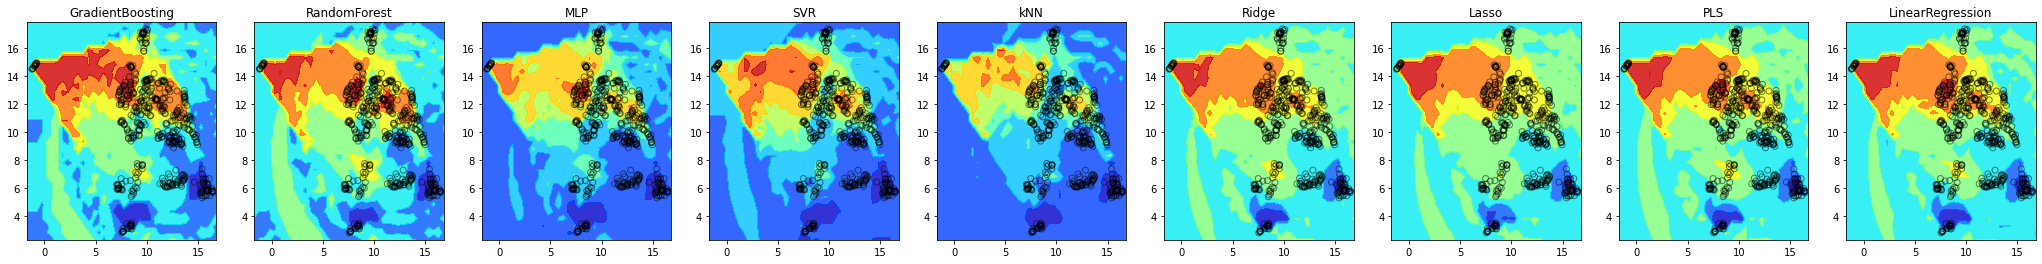

In [ ]:
all_sklearn.show_allsklearn_pcaumap(objective3, pcaumap3, X_train3, X_test3)

In [ ]:
!date

Mon Feb  8 09:04:55 UTC 2021


In [ ]:
stacking_model3 = all_sklearn.stacking(objective3)
stacking_model3.fit(X_train3, y_train["Dipole moment"])
stacking_model3.score(X_test3, y_test["Dipole moment"])

0.5314395118427275

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'stacking_model3.pkl', 'wb') as obj:
  pickle.dump(stacking_model3 , obj)

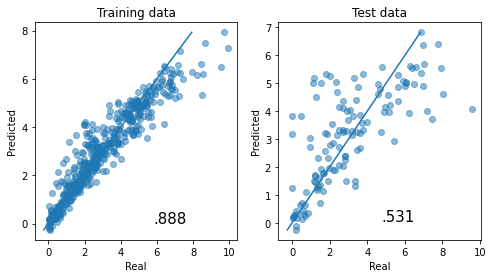

In [ ]:
all_sklearn.show_metrics(stacking_model3, X_train3, X_test3, y_train["Dipole moment"], y_test["Dipole moment"])

inside function
   (0, 0)	1.0
  (0, 30)	0.23143145
  (0, 60)	0.2785765
  (0, 70)	0.26328284
  (0, 100)	0.2319978
  (0, 183)	0.44524938
  (0, 253)	0.2463843
  (0, 337)	0.2432278
  (0, 342)	0.23716782
  (0, 343)	0.55147177
  (0, 431)	0.2410368
  (0, 441)	0.23406525
  (0, 506)	0.23299545
  (0, 514)	0.23466414
  (0, 527)	0.23534209
  (1, 1)	1.0
  (1, 17)	0.16990797
  (1, 43)	0.12923414
  (1, 90)	0.649298
  (1, 145)	0.12632896
  (1, 168)	0.5355975
  (1, 281)	0.1284786
  (1, 309)	0.17931938
  (1, 404)	0.3428641
  (1, 414)	0.33650342
  :	:
  (504, 234)	0.31404752
  (504, 242)	0.2511034
  (504, 263)	0.22264726
  (504, 275)	0.18731484
  (504, 306)	0.16644853
  (504, 322)	0.825982
  (504, 326)	0.20016116
  (504, 381)	0.53169745
  (504, 504)	1.0
  (504, 615)	0.12314667
  (505, 23)	0.18282264
  (505, 32)	0.223136
  (505, 65)	0.16166244
  (505, 99)	0.1446564
  (505, 109)	0.17357364
  (505, 134)	0.13995476
  (505, 148)	0.633253
  (505, 207)	0.32398906
  (505, 245)	0.18326531
  (505, 246)	0.16261388


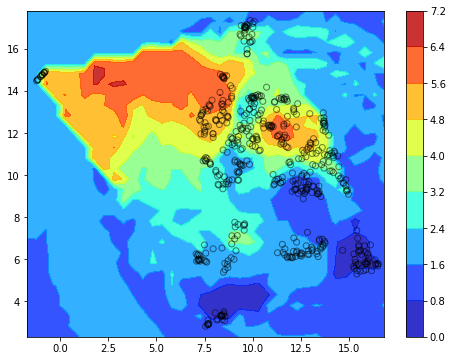

In [ ]:
all_sklearn.show_pcaumap(pcaumap3, X_train3, X_test3, model=stacking_model3)

In [ ]:
!date

Mon Feb  8 09:05:14 UTC 2021


In [ ]:
import shap 

sample_size = 100
pred_func = lambda X: stacking_model3.predict(X).ravel()
explainer3 = shap.KernelExplainer(pred_func, shap.kmeans(X_test3, sample_size))
shap_values3 = explainer3.shap_values(X_test3)

In [ ]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'shap_values3.pkl', 'wb') as obj:
  pickle.dump(shap_values3 , obj)

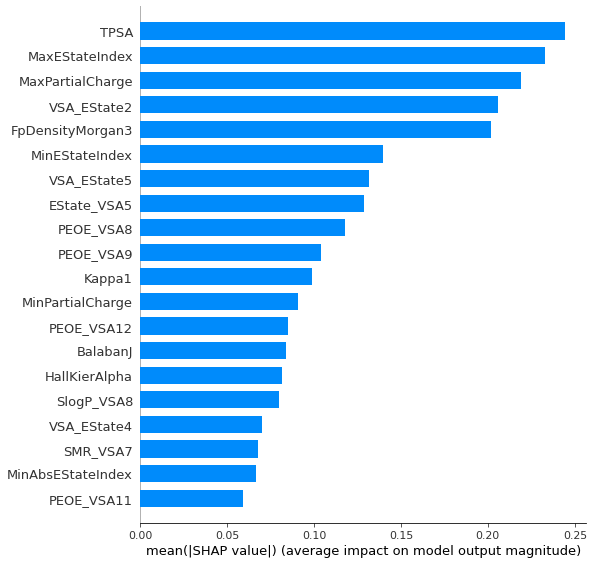

In [ ]:
shap.summary_plot(shap_values3, features=X_test3, plot_type="bar")

In [ ]:
global_shap_values = np.abs(shap_values3).mean(0)
shap_corr = [np.corrcoef(shap_values3[:, i], X_test3.iloc[:, i])[0, 1] for i in range(len(shap_values3.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)

global_shap_coefs_df = pd.DataFrame(
    global_shap_coefs, 
    columns=["Global SHAP coef"],
    index=X_test3.columns
    ).dropna().sort_values("Global SHAP coef", ascending=False)

global_shap_coefs_df.style.bar(subset=["Global SHAP coef"], align='mid')

not enough data in bin #2 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #3 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #6 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #7 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #8 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #10 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #1 for feature PEOE_VSA12, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #3 for feature PEOE_VSA12, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #4 for feature PEOE_VSA12, so it'll be i

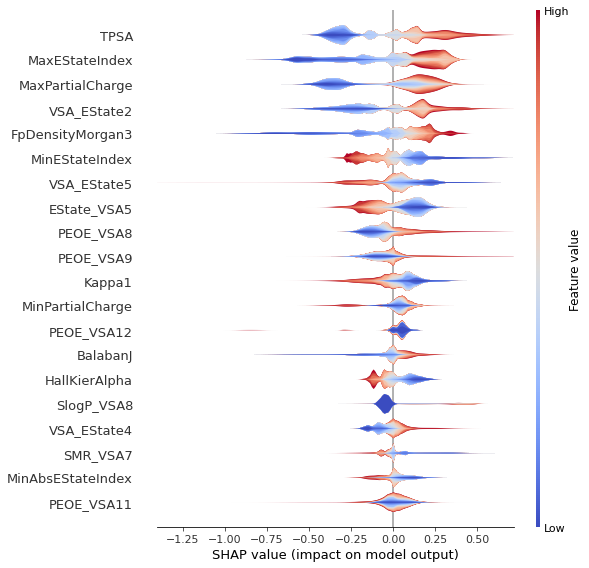

In [ ]:
shap.summary_plot(shap_values3, features=X_test3, plot_type="layered_violin")

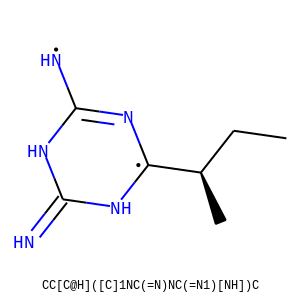

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

index = 0

smile = df['Open Babel SMILES'][X_test.index[index]]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [ ]:
shap.initjs()
shap.force_plot(explainer3.expected_value, shap_values3[index,:], X_test3.iloc[index,:], link="logit")

In [ ]:
shap.initjs()
shap.force_plot(explainer3.expected_value, shap_values3, X_test3)

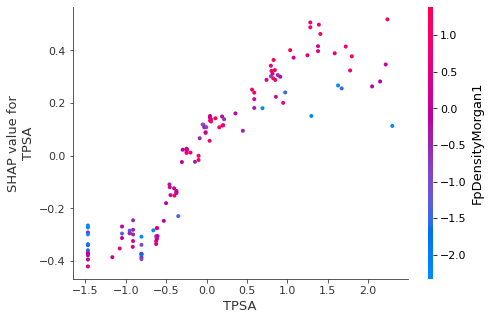

In [ ]:
shap.dependence_plot("TPSA", shap_values3, X_test3)

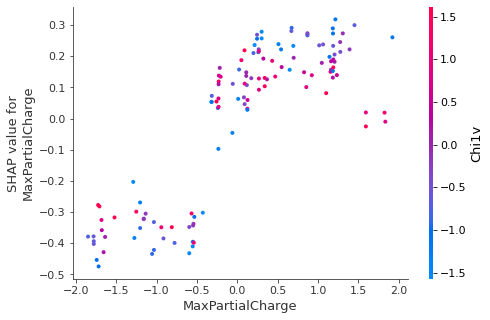

In [ ]:
shap.dependence_plot("MaxPartialCharge", shap_values3, X_test3)

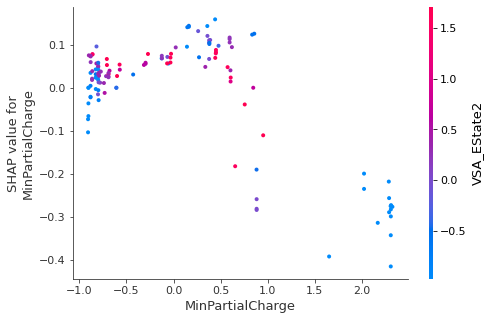

In [ ]:
shap.dependence_plot("MinPartialCharge", shap_values3, X_test3)

In [ ]:
!date

Mon Feb  8 09:30:05 UTC 2021
